<a href="https://colab.research.google.com/github/MoeinDSP/Data-and-Information-Quality/blob/main/2_Data_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lux-api plotly matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.7 MB/s eta 0:00:00
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185712 sha256=84ea880fca39e23070a70f0749ecdbdcc64e56200f7390f136a62f35bd9a344d
  Stored in directory: /root/.cache/pip/wheels/c4/96/d2/ffa7f6c489166338d6d66a644375d56e6d794b780f1bb671ac
  Created wheel for lux-widget: filename=lux_widget-0.1.11-py3-none-any.whl size=2540453 sha256=b197fec55b9556a01ce53d7c0c4ede34f7f091069d005a4aa82955bee7f7faaf
  Stored in directory: /root/.cache/pip/wheels/e3/52/42/3824e2f5f2d38ee1cb7d3e12ca7734e99

In [2]:
import pandas as pd
import json
import seaborn as sns
import lux
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

**Data Profiling**

Data profiling is the set of activities and processes designed to determine the metadata of a given dataset.

Data profiling helps understand and prepare data for subsequent cleaning, integration, and analysis.

**Import Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data and Information Quality/met_museum_objects.txt')

/tmp/ipython-input-544127982.py:1: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data and Information Quality/met_museum_objects.txt')


**Profiling**

In [4]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository'],
      dtype='object')

In [5]:
df.shape

(448203, 43)

In [6]:
df.dtypes

Object Number              object
Is Highlight                 bool
Is Public Domain             bool
Object ID                   int64
Department                 object
Object Name                object
Title                      object
Culture                    object
Period                     object
Dynasty                    object
Reign                      object
Portfolio                  object
Artist Role                object
Artist Prefix              object
Artist Display Name        object
Artist Display Bio         object
Artist Suffix              object
Artist Alpha Sort          object
Artist Nationality         object
Artist Begin Date          object
Artist End Date            object
Object Date                object
Object Begin Date           int64
Object End Date             int64
Medium                     object
Dimensions                 object
Credit Line                object
Geography Type             object
City                       object
State         

In [7]:
#display numeric columns
NUM = list(df.select_dtypes(include=['int64','float64']).columns)
NUM

['Object ID', 'Object Begin Date', 'Object End Date']

In [8]:
#display categorical columns
CAT = list(df.select_dtypes(include=['bool','object']).columns)
CAT

['Object Number',
 'Is Highlight',
 'Is Public Domain',
 'Department',
 'Object Name',
 'Title',
 'Culture',
 'Period',
 'Dynasty',
 'Reign',
 'Portfolio',
 'Artist Role',
 'Artist Prefix',
 'Artist Display Name',
 'Artist Display Bio',
 'Artist Suffix',
 'Artist Alpha Sort',
 'Artist Nationality',
 'Artist Begin Date',
 'Artist End Date',
 'Object Date',
 'Medium',
 'Dimensions',
 'Credit Line',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Classification',
 'Rights and Reproduction',
 'Link Resource',
 'Metadata Date',
 'Repository']

**SINGLE COLUMN ANALYSIS**
Cardinalities

Cardinalities are numbers that summarize simple metadata (e.g., number of rows, attributes, null values, distinct values, Uniqueness and Distinctness).

Cardinality = count of the number of distinct actual values.

Uniqueness = percentage calculated as Cardinality divided by the total number of records.

Actual = count of the number of records with an actual value (i.e., not-null).

Distinctness = percentage calculated as Cardinality divided by Actual.



In [9]:
#len command counts the number of rows
ROWS = len(df['Object ID'])
ROWS

448203

In [10]:
#number of rows with shape function
df.shape[0]

448203

In [11]:
#number of columns with shape function
df.shape[1]

43

In [12]:
CELLS = df.shape[0]*df.shape[1]
CELLS

19272729

In [13]:
#number of non—null observation in a column (attribute "Object ID")
COUNT = df['Object ID'].count()
COUNT

np.int64(448203)

In [14]:
#value counts is the same of a group by (attribute "Object ID")
df['Object ID'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
#nunique is the number of distict values for an attribute (attribute "Object ID")
DISTINCT = (df['Object ID'].nunique())
DISTINCT

448203

UNIQUENESS EVALUATION:

In [16]:
#for attribute "Object ID"
UNIQUENESS = DISTINCT / ROWS
print("UNIQUENESS: ", UNIQUENESS)

UNIQUENESS:  1.0


Value distributions

Value distributions summarize the distribution of values within a column (e.g., extremes and Constancy). A common representation for value distributions are Histograms.

Constancy = frequency of the most frequent value divided by the total number of values. It might reveals the presence of standard values.

In [17]:
#extremes (attribute "Object End Date")
print ('MIN:', df['Object End Date'].min())
print ('MAX:', df['Object End Date'].max())
print ('MODE:',df['Object End Date'].mode()[0])

MIN: -35000
MAX: 18591861
MODE: 1899


In [18]:
#extremes (all attributes)
print ('MIN: ', df[NUM].min())
print("\n\n")
print ('MAX: ', df[NUM].max())

MIN:  Object ID                1
Object Begin Date   -95000
Object End Date     -35000
dtype: int64



MAX:  Object ID              750830
Object Begin Date    18591861
Object End Date      18591861
dtype: int64


In [19]:
#other information: Mean and Standard deviation
print('Average:', df['Object End Date'].mean())
print('Standard Deviation:', df['Object End Date'].std())

Average: 1493.4463557807512
Standard Deviation: 27787.12402845055


In [25]:
#find max of value counts (attribute "Object End Date")
MAX_COUNTS = max(df['Object ID'].value_counts())
MAX_COUNTS

1

CONSTANCY EVALUATION:

In [22]:
#for attribute "Object ID"
CONSTANCY = MAX_COUNTS / COUNT
print("CONSTANCY: ", CONSTANCY)

CONSTANCY:  0.04647447696691008


Histograms are often used to fit distributions to the data. Analysts can check if the values of some columns are (approximately) normally distributed, and the number of outliers may be returned.

<Axes: >

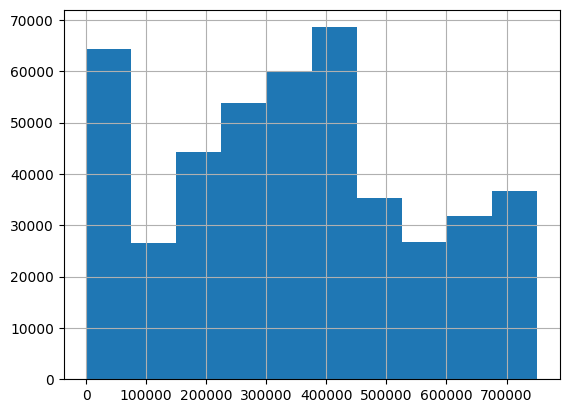

In [24]:
#plot the distribution of the attribute "Object ID" with hist function
df['Object ID'].hist()

In [26]:
#describe function get different properties for all the numerical attributes of the table
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

array([[<Axes: title={'center': 'Object ID'}>,
        <Axes: title={'center': 'Object End Date'}>]], dtype=object)

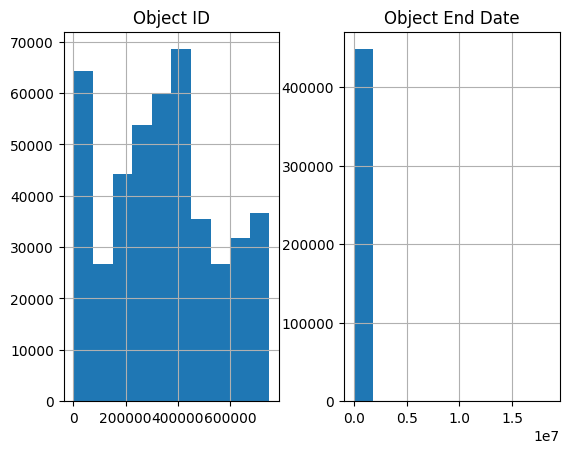

In [28]:
#we can also display multiple histograms
df[['Object ID','Object End Date']].hist()

In [29]:
#correlation evaluation base on pearson correlation coefficient
df[NUM].corr(method='pearson')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [30]:
#correlation evaluation base on spearman correlation coefficient
corr = df[NUM].corr(method ='spearman')

<Axes: >

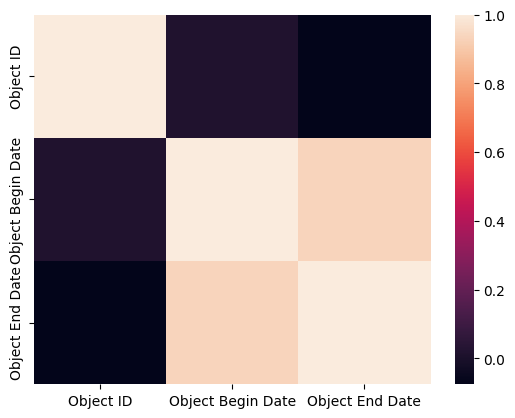

In [31]:
#correlation evaluation heatmap
sns.heatmap(corr)

LUX LIBRARY (alternative library for correlation discovery)

In [32]:
df.default_display = "lux"

MATPLOTLIB (very useful library for data visualization)

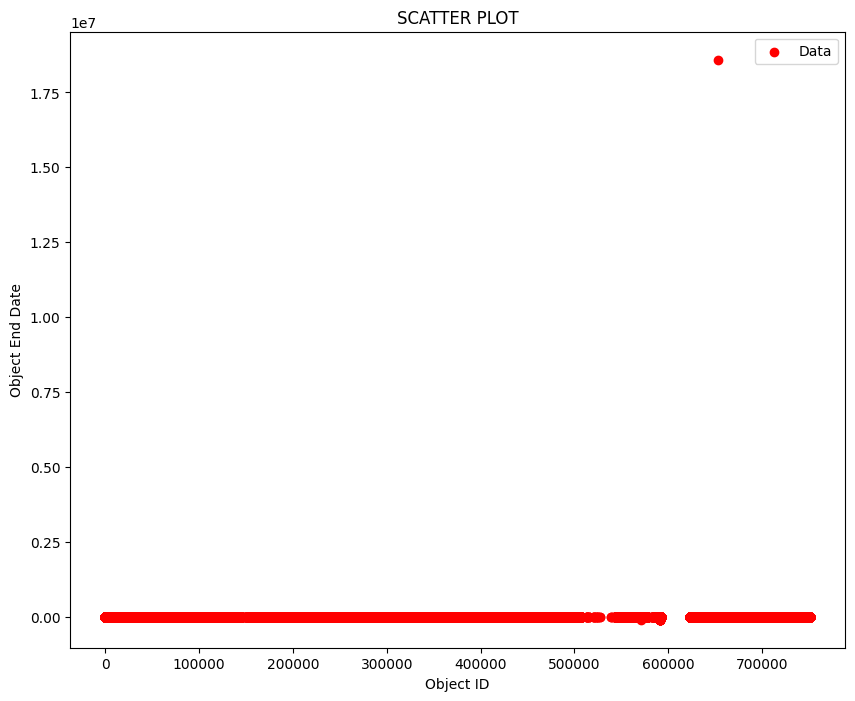

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(df["Object ID"], df["Object Begin Date"], marker='o', color='r', label='Data')
plt.xlabel('Object ID')
plt.ylabel('Object End Date')
plt.title('SCATTER PLOT')
plt.legend()
plt.grid(False)
plt.show()